In [1]:
import numpy as np
from scipy import stats

In [133]:
# Metropolis-Hasting algorithm
def metropolis_binomial(num_iter,a,b,n,y,theta,prior,liklihood):
    
    
    res = []
    θ_old  = theta
    res.append(θ_old)
    n_c = 1
    
    d = prior(θ_old,a,b)*liklihood(y,n,θ_old) #posterior probability corresponding to initial θ
    
    
    for i in range(1,num_iter+1):
        random_innov = stats.norm.rvs(scale = 0.3)
        θ_new = θ_old + random_innov
            
        #calculate rejection/acceptance rati0
        #check for the range of θ
        if θ_new < 0 or θ_new > 1:
            r = 0
        else:
            num = prior(θ_new,a,b)*liklihood(y,n,θ_new) #numerator
            r = min(1,num/d)
            
        u = np.random.uniform(0,1)
        if r > u: 
            θ_old = θ_new
            d = num
            n_c+=1
            res.append(θ_old)
    burn_in = len(res)//2
    return res[burn_in:],n_c
        

In [134]:
np.random.seed(0)
a = 10 #shape parameter for Beta distribution
b = 10 #shape parameter for Beta distribution
n = 50 #ttotal number of trials
y = 25 #total number of successful trial
theta = np.random.rand() #initial value of θ
num_iter = 10000 #totla number of iterations
sample,n_c = metropolis_binomial(num_iter,a,b,n,y,theta,stats.beta.pdf,stats.binom.pmf)

Greater the efficiency, lesser the auto-correlation between samples.

In [135]:
efficiency = n_c/num_iter
print(f"efficiency = {efficiency*100}%")

efficiency = 23.849999999999998%


In [160]:
r = st.beta.rvs(a+y, b+n-y, size=1000) #generate  theoretical sampels from posterior distribution

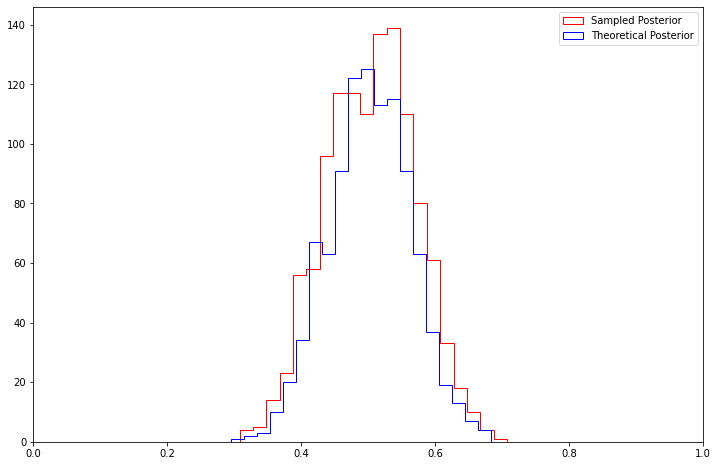

In [161]:
plt.figure(figsize =(12,8))
plt.hist(sample,20,histtype='step',color = 'r',label='Sampled Posterior')
plt.hist(r,20,histtype='step',color = 'b',label='Theoretical Posterior')
plt.legend()
plt.xlim([0,1])
plt.show()